In [28]:
from Prediction import Prediction
from DataPreparation import DataPreparation
import pandas as pd
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
import tensorflow as tf 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
wdir = '/Users/francaspeth/Downloads/franca0607/'

## Load pretrained Models:

In [29]:
with open(wdir+'ETCslidMaxVarmax100Epochmodel_config.json') as json_file:
    json_config = json_file.read()
modelmax = tf.keras.models.model_from_json(json_config)
modelmax.load_weights(wdir+'ETCslidMaxVarmax100Epoch_weights.h5')

In [30]:
with open(wdir+'ETCslidMediumVarmedium100Epochmodelmodel_config.json') as json_file:
    json_config = json_file.read()
modelmedium = tf.keras.models.model_from_json(json_config)
modelmedium.load_weights(wdir+'ETCslidMediumVarmedium100Epoch_weights.h5')

In [31]:
with open(wdir+'ETCslidMinVarmin100Epochmodel_config.json') as json_file:
    json_config = json_file.read()
modelmin = tf.keras.models.model_from_json(json_config)
modelmin.load_weights(wdir+'ETCslidMinVarmin100Epoch_weights.h5')

In [6]:
timestep = 10

In [7]:
cols = ['num_emptyblocks', 'hashrate', 'block_time',
       'total_num_uncles','dummy_miner_count']

In [8]:
test20 = pd.read_csv('/Users/francaspeth/Google Drive/Masterarbeit/Share/final/ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest20 = DataPreparation(test20, timestep=timestep)
PrepTest20.df.sort_values('number')
PrepTest20.change_idx()
label_list = PrepTest20.df['label'].tolist()
PrepTest20.change_data_types(cols)

testp20 = PrepTest20.transform_data()

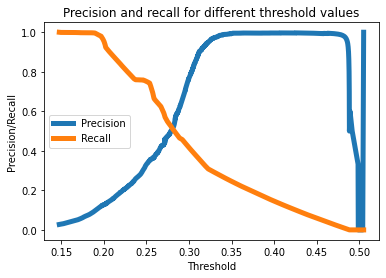

In [32]:
Predmin = Prediction(
    model = modelmin,
    test = testp20
)
Predmin.make_prediction()
Predmin.plot_pr_diagram(label_list,timestep)

In [33]:
Predmin.performance(0.33,label_list, timestep )

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.33 are as follows:
        [[2185664     124]
 [  10860    4460]]

        % of transactions labeled as fraud that were correct (precision): 4460/(124+4460) = 97.29%
        % of fraudulent transactions were caught succesfully (recall):    4460/(10860+4460) = 29.11%
        Accuracy: 99.50% 
        F1 Score: 0.4481511254019293


In [34]:
Predmedium = Prediction(
    model = modelmedium,
    test = testp20
)

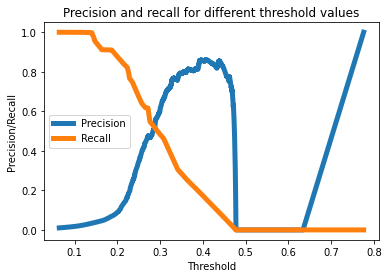

In [35]:
Predmedium.make_prediction()
Predmedium.plot_pr_diagram(label_list,timestep)

In [38]:
Predmedium.performance(0.228,label_list, timestep )

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.228 are as follows:
        [[2136165   49623]
 [   3517   11803]]

        % of transactions labeled as fraud that were correct (precision): 11803/(49623+11803) = 19.21%
        % of fraudulent transactions were caught succesfully (recall):    11803/(3517+11803) = 77.04%
        Accuracy: 97.59% 
        F1 Score: 0.307586063117296


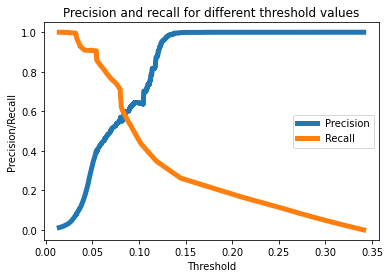

In [36]:
Predmax = Prediction(
    model = modelmax,
    test = testp20
)
Predmax.make_prediction()
Predmax.plot_pr_diagram(label_list,timestep)

In [37]:
Predmax.performance(0.15,label_list, timestep )

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.15 are as follows:
        [[2185784       4]
 [  11424    3896]]

        % of transactions labeled as fraud that were correct (precision): 3896/(4+3896) = 99.90%
        % of fraudulent transactions were caught succesfully (recall):    3896/(11424+3896) = 25.43%
        Accuracy: 99.48% 
        F1 Score: 0.40541103017689906
